<a href="https://colab.research.google.com/github/Hamsa-18/Capgemini-training/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Step 2: Load dataset
df = pd.read_csv(r"/content/student_performance.csv")

# Display first 5 rows
print("\n--- First 5 Rows ---")
print(df.head())

# Dataset info
print("\n--- Dataset Info ---")
print(df.info())

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- First 5 Rows ---
   Hours_Studied  Previous_Scores Extracurricular  Sleep_Hours  \
0              2               40              No            6   
1              5               60             Yes            7   
2              8               85              No            8   
3              1               35              No            5   
4              6               75             Yes            7   

  Internet_Access  Attendance Performance  
0             Yes          70         Low  
1             Yes          80      Medium  
2             Yes          90        High  
3              No          60         Low  
4             Yes          85        High  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracur

In [ ]:
# Step 3: Encode categorical variables
label_encoders = {}
for col in ['Extracurricular', 'Internet_Access', 'Performance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\n--- After Encoding ---")
print(df.head())


--- After Encoding ---
   Hours_Studied  Previous_Scores  Extracurricular  Sleep_Hours  \
0              2               40                0            6   
1              5               60                1            7   
2              8               85                0            8   
3              1               35                0            5   
4              6               75                1            7   

   Internet_Access  Attendance  Performance  
0                1          70            1  
1                1          80            2  
2                1          90            0  
3                0          60            1  
4                1          85            0  


In [ ]:
# Step 4: Train-test split
X = df.drop("Performance", axis=1)
y = df["Performance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (14, 6)
Testing set size: (6, 6)


In [ ]:
# Step 5: Build Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Show rules
print("\n--- Decision Rules (Tree Structure) ---")
print(export_text(dt, feature_names=list(X.columns)))


--- Decision Rules (Tree Structure) ---
|--- Hours_Studied <= 3.50
|   |--- class: 1
|--- Hours_Studied >  3.50
|   |--- Hours_Studied <= 5.50
|   |   |--- class: 2
|   |--- Hours_Studied >  5.50
|   |   |--- class: 0



In [ ]:
# Step 6: Model Evaluation
y_pred = dt.predict(X_test)

print("\n--- Accuracy ---")
print(accuracy_score(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Accuracy ---
1.0

--- Confusion Matrix ---
[[2 0 0]
 [0 2 0]
 [0 0 2]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
# Step 7: Try different criteria & depths
criteria = ["gini", "entropy"]
depths = [2, 3, 4, 5, None]

results = []
for crit in criteria:
    for depth in depths:
        model = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((crit, depth, acc))

print("\n--- Tuning Results ---")
for r in results:
    print(f"Criterion: {r[0]}, Max Depth: {r[1]}, Accuracy: {r[2]:.3f}")


--- Tuning Results ---
Criterion: gini, Max Depth: 2, Accuracy: 1.000
Criterion: gini, Max Depth: 3, Accuracy: 1.000
Criterion: gini, Max Depth: 4, Accuracy: 1.000
Criterion: gini, Max Depth: 5, Accuracy: 1.000
Criterion: gini, Max Depth: None, Accuracy: 1.000
Criterion: entropy, Max Depth: 2, Accuracy: 1.000
Criterion: entropy, Max Depth: 3, Accuracy: 1.000
Criterion: entropy, Max Depth: 4, Accuracy: 1.000
Criterion: entropy, Max Depth: 5, Accuracy: 1.000
Criterion: entropy, Max Depth: None, Accuracy: 1.000


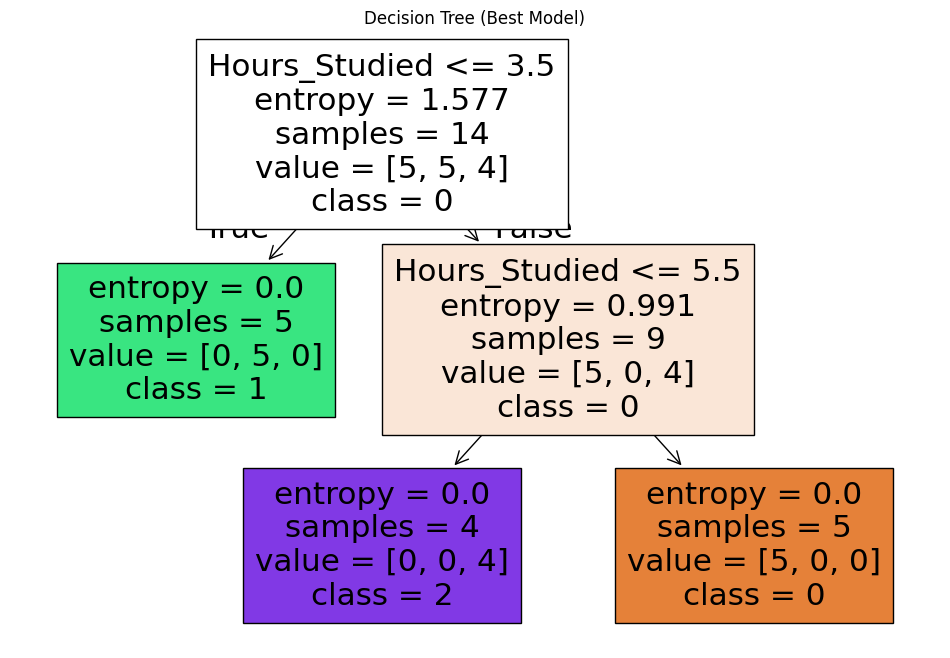

In [ ]:
# Step 8: Choose best model (example: entropy, depth=3)
best_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
best_dt.fit(X_train, y_train)

# Automatically detect class names
class_labels = [str(c) for c in best_dt.classes_]

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=X.columns, class_names=class_labels, filled=True)
plt.title("Decision Tree (Best Model)")
plt.show()

In [ ]:
# Step 9: Feature Importance
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- Feature Importances ---")
print(importances)


--- Feature Importances ---
           Feature  Importance
0    Hours_Studied         1.0
1  Previous_Scores         0.0
2  Extracurricular         0.0
3      Sleep_Hours         0.0
4  Internet_Access         0.0
5       Attendance         0.0


In [ ]:
# Step 10: Insights & Conclusion
print("\n--- Insights & Conclusion ---")
print("1. Features like Hours_Studied, Previous_Scores, and Attendance strongly influence performance.")
print("2. Teachers can use this model to guide students towards better study habits and attendance.")
print("3. Decision Trees are interpretable and show clear decision rules, which makes them useful in education analytics.")


--- Insights & Conclusion ---
1. Features like Hours_Studied, Previous_Scores, and Attendance strongly influence performance.
2. Teachers can use this model to guide students towards better study habits and attendance.
3. Decision Trees are interpretable and show clear decision rules, which makes them useful in education analytics.
